# Prospecção de Dados (Data Mining) DI/FCUL - HA1

## First Home Assignement (MC/DI/FCUL - 2024)

### Fill in the section below

### GROUP:`01`

* Catherine Prokhorov (62608) - 3 Hours worked on the project
* Guilherme Cepeda (62931) - 1 Hours worked on the project
* Jorge Aleluia, (54549) - Hours worked on the project
* Rómulo Nogueira (56935) - Hours worked on the project




The purpose of this Home Assignment is
* Read a Data file with a Set of Texts
* Compute similarities between texts
* Perform simple classification of texts using a Naive Bayes classifier

**NOTE 1: Students are not allowed to add more cells to the notebook**

**NOTE 2: The notebook must be submited fully executed**


## 1. Read the Dataset

The dataset is the file `Sentences_75Agree.txt` from the [Financial Sentiment Analysis database on Gugging Face](https://huggingface.co/datasets/financial_phrasebank)

* Read the dataset and separate them by unique documents (one document per line)
* The last word of each document is the class and it **must be removed from the document** but kept separate for use in the classification tasks below
    * classes can be `.@positive`, `.@negative`, `.@neutral`
    


In [1]:
### Your code Here

# tirem os comments depois
'''import re

# Forma 1 de fazer
file = open('Sentences_75Agree.txt', 'r').readlines()
docs = {}
classes = {}
pattern = r'\@(positive|negative|neutral)\b'

i = 0
for line in file:
    l = re.split(pattern, line)
    docs[i] = l[0]
    classes[i] = l[1]
    i += 1

print(docs)
print(classes)
    
# Forma 2 de fazer
file = open('Sentences_75Agree.txt', 'r').readlines()
docs = {}
classes = {}

i = 0
for line in file:
    docs[i] = " ".join(line.split()[:-1])
    classes[i] = line.split()[-1]
    i += 1

print(docs)
print(classes)'''


# third way

dataset = open("Sentences_75Agree.txt", 'rt', encoding='ISO-8859-1').readlines() # encoding='ISO-8859-1' because the dataset had some characters that weren't encoded in the 'utf-8' format

#documents
docs = []
#classes
classes = []

for line in dataset:
    # first we will remove the whitespace caracters from each line
    line = line.strip()
    # then divide each line into a document/text and the respective class
    document, cl = line[:-10], line[-10:]
    # append the document and the class to the respective lists
    docs.append(document)
    classes.append(cl)

#printing
for i in range(len(docs)):
    print("Document:", docs[i])
    print("Class:", classes[i])
    print("\n")

Document: According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing
Class:  .@neutral


Document: With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability 
Class: .@positive


Document: For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m 
Class: .@positive


Document: In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating profit by 34.9 % to EUR 23.5 mn 
Class: .@positive


Document: Operating profit rose to EUR 13.1 mn from EUR 8.7 mn in the corresponding period in 2007 representing 7.7 % of net sales 
Class: .@positive


Document: Operating profit totalled EUR 21.1 mn , up from EUR 18.6 mn in 2007 

## Outra forma:

In [ ]:
dataset = open("Sentences_75Agree.txt", "rt", encoding='ISO-8859-1').readlines()

documents=[]
classes=[]

for line in dataset:
    # separar em texto e classes
    parts = line.strip().split()
    text = ' '.join(parts[:-1])  # juntar tudo excepto a ultima parte
    doc_class = parts[-1]  # ultima parte
    
    documents.append(text)
    classes.append(doc_class)
    
for i, (doc, doc_class) in enumerate(zip(documents, classes)):
    print("Doc %d (Class: %s):\n %s" % (i+1, doc_class, doc))

## 2. Compute similarities between texts

* Compute the TF.IDF of all words in texts
* compute the average similarity beween texts
* Plot the document similarity distribution (suggestion use [boxplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html) or [histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) or  [histograms with density](https://matplotlib.org/stable/gallery/statistics/histogram_features.html))
* Comment your results


In [4]:
### Add supporting functions here

import numpy as np
import unicodedata
from math import log2
import matplotlib.pyplot as plt

def basic_word_tokenizer(text):
    return text.split()

def remove_accents(s):
    nfkd_form = unicodedata.normalize('NFKD', s)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

def remove_stuff(s):
    for c in "\\\t0123456789Ææœ—‘’\ufeff{|}“”.,()$£%&[]?@#!=;*+–\"ǁ":
        s=s.replace(c, "")
    s=s.replace("-", " ")
    return s

def get_words_from_corpus(corpus):
    words_texts=[]
    for i,text in enumerate(corpus):
        text=text.strip().lower()
        text=remove_accents(text)
        text=remove_stuff(text)
        text=text.lower()
        words = basic_word_tokenizer(text)
        words_texts.append(words)
    return words_texts

def calc_all_words(words_text_sets):
    all_words=set()
    for words in words_text_sets: all_words |= words
    return all_words

def word_counter(words):
    unique_words=set(words)
    D=dict(zip(unique_words, [0]*len(unique_words)))
    for w in words: D[w]+=1
    return D  

def TF(word_counts):
    counts  = word_counts.values()
    if len(counts)==0: return {}
    the_max = max(counts)
    return dict(zip(word_counts.keys(), [c/the_max for c in counts])) 

def calc_tfs(words_texts):
    all_tfs=[]
    for words in words_texts:
        wcounts = word_counter(words)
        all_tfs.append(TF(wcounts))
    return all_tfs

def IDF(all_words, doc_word_counts):
    D=dict(zip(all_words, [0]*len(all_words)))
    N=len(doc_word_counts)
    for doc in doc_word_counts:
        for word in doc: D[word]+=1
    return {w: log2(N/D[w]) for w in D}

def TFIDF(all_tfs, idfs):
    tfidfs = []
    for tf in all_tfs:
        tfidf = {word: tf[word] * idfs[word] for word in tf}
        tfidfs.append(tfidf)
    return tfidfs

def compute_tf_idf(dataset):
    words_texts = get_words_from_corpus(dataset)
    words_text_sets = [set(words) for words in words_texts]
    all_words = calc_all_words(words_text_sets)
    all_tfs = calc_tfs(words_texts)
    idfs = IDF(all_words, words_text_sets)
    tfidfs = TFIDF(all_tfs, idfs)
    return tfidfs

def cosine_similarity_tfidf(idx1, idx2, words_text_sets, all_tfs, idfs):
    text1= words_text_sets[idx1]
    text2= words_text_sets[idx2]
    tfs1=all_tfs[idx1]
    tfs2=all_tfs[idx2]

    common_words = text1 & text2
    if len(common_words)==0: return 0.0
    common_tfidfs = [tfs1[w]*tfs2[w]*idfs[w]*idfs[w] for w in common_words]

    tfidfs2_1=np.array([tfs1[w]*idfs[w] for w in text1])**2
    tfidfs2_2=np.array([tfs2[w]*idfs[w] for w in text2])**2

    return sum(common_tfidfs)/(np.sqrt(tfidfs2_1.sum())*np.sqrt(tfidfs2_2.sum()))

def text_similarities2(words_text_sets, all_tfs, idfs):
    N=len(words_text_sets)
    sims=[]
    for i in range(N-1):
        for j in range(i+1, N):
            sim = cosine_similarity_tfidf(i,j, words_text_sets, all_tfs, idfs)
            sims.append((sim, (i,j)))
    return sims

TF.IDF do Documento 1:
production: 1.8887239258676822
is: 1.6832106189050038
the: 0.3351627220866973
gran: 3.5845448729511284
plans: 2.6155813410816227
russia: 2.008571388096729
although: 3.389557372710743
that: 1.2802484275411417
growing: 2.8612365391370247
company: 1.7774478517353647
according: 1.8416053094525018
all: 1.9569971898305152
has: 1.1147478942385616
neutral: 0.23801003363320938
where: 2.4772355079886745
move: 2.5553905925343487
no: 2.087260507507904
to: 1.2993353252334876

TF.IDF do Documento 2:
demand: 1.4588406000432181
raw: 1.5693488046489739
positive: 0.39908228082533237
production: 2.266468711041219
the: 0.5027440831300459
company: 0.5332343555206095
with: 0.6757190375012924
of: 0.21430357078066242
to: 0.25986706504669754
capacity: 1.3507269237706774
improve: 1.6106389801424592
increase: 3.452180771312032
materials: 1.5167419234822148
its: 0.634486807385686
would: 2.3483966277966184
expected: 1.1462533611649863
meet: 1.886341304793205
in: 0.23392233571916898
therefore

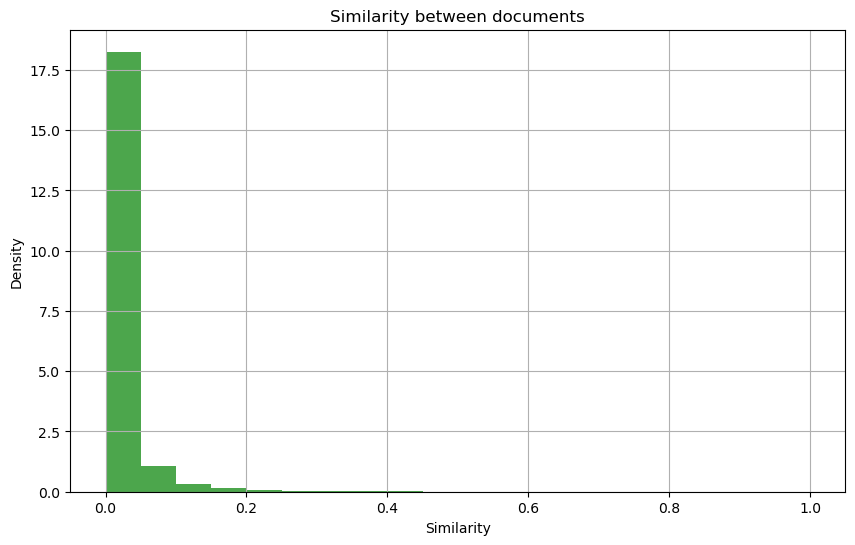

In [5]:
### Add processing code here

# computing the TF.IDF of all the words in texts
tf_idfs = compute_tf_idf(dataset)

for i, tfidfs in enumerate(tf_idfs):
    print(f"TF.IDF do Documento {i+1}:")
    for word, value in tfidfs.items():
        print(f"{word}: {value}")
    print()

# computing the average similarity beween texts
words_texts = get_words_from_corpus(dataset)
words_text_sets = [set(words) for words in words_texts]
all_words = calc_all_words(words_text_sets)
all_tfs = calc_tfs(words_texts)
idfs = IDF(all_words, words_text_sets)

similarities  = text_similarities2(words_text_sets, all_tfs, idfs)
total_similarity = sum(sim[0] for sim in similarities)

avg_similarity = total_similarity / len(similarities)
print("Average similarity between documents:", avg_similarity)


# plot histogram of similarities
h_similarities = [sim[0] for sim in similarities]

plt.figure(figsize=(10, 6))
plt.hist(h_similarities, bins=20, density=True, alpha=0.7, color='green')
plt.title('Similarity between documents')
plt.xlabel('Similarity')
plt.ylabel('Density')
plt.grid(True)
plt.show()

### Your short analysis here

As we can see from the results and the histogram above .....
* Relacionar o valor da similariade entre textos/ docuumentos com o histograma
* Ver se o histograma da densidade e realmente o melhor
* Talvez referir algo sobre os valores do tf.idf acima


## 3. Make a Naive Bayes Classifier 

* Split dataset randomly into training and testing (20% for testing)
* Train a Naive Bayes Model and do some sensitivity analyis on the hyperparameters 
* Evaluate your results with the testing set


In [ ]:
### Add supporting functions here
from scipy.stats import norm

#this function will compute the means and std deviations for all classes
def get_class_stats(X, y):
    classes=list(set(y))
    N,M=X.shape
    stats={c: None for c in classes}
    for c in classes:
        mX = X[y==c,:]
        means = np.mean(mX, axis=0)
        stds  = np.sqrt(np.var(mX, axis=0))
        count,_=mX.shape
        stats[c]=(count, means, stds)
    return stats
    
#this function will get all the gaussians: One for each variable, class combination
def get_gaussians(stats):
    gaussians={}
    for c in stats:
        N, means, stds=stats[c]
        gaussians[c]=[norm(loc=mean, scale=stds[i]) for i, mean in enumerate(means)]
    return gaussians

def get_priors(stats):
    priors = {}
    total  = 0
    for c in stats:
        N, means, stds=stats[c]
        priors[c]=N
        total+=N
    for c in priors: priors[c]/=total
    return priors

def gnb_predict(Xtst, priors, gaussians):
    N,M = Xtst.shape
    res         = -np.ones(N)
    final_preds = -np.zeros(N)
    final_preds=final_preds.astype(str)
    for c in gaussians:
        preds=np.ones(N)*priors[c]
        for col in range(M): preds*=gaussians[c][col].pdf(Xtst[:,col])
        final_preds[preds>res]=c
        res[preds>res]=preds[preds>res]
    return final_preds


In [ ]:
### Add processing code here

# from sklearn.base import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import train_test_split



# X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=22)

# stats = get_class_stats(X_train,y_train)
# gaussians= get_gaussians(stats)
# priors = get_priors(stats)
# preds = gnb_predict(X_test, priors, gaussians)
# preds=preds.astype(int)  #we need to convert the data to integers

# print("The global accuracy is: %7.4f" % accuracy_score(y_test, preds))
# print(confusion_matrix(y_test, preds))

## 4. Discuss your findings [to fill on your own]

* Comment your results above
* Discuss how could they be used in a Big Data environment


Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum
